In [1]:
import pandas as pd

importing data

In [2]:
ufo_data = pd.read_csv("ufo_sighting_data.csv")
moon_data_raw = pd.read_html("lunar_calendar.html")
meteorite_data = pd.read_csv("meteorite_data.csv")

C:\Users\robertaparna\AppData\Local\Temp\ipykernel_14984\692714877.py:1: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  ufo_data = pd.read_csv("ufo_sighting_data.csv")


### CREATING A MODEL FOR PREDICTING UFO SHAPE

In [3]:
#disregarding colums that won't be useful
ufo_data_clone_2 = ufo_data.copy()
ufo_data = ufo_data.drop(['described_duration_of_encounter', 'description', 'city', 'state/province', 'latitude', 'longitude'], axis=1)
ufo_data = ufo_data.dropna()

#changing invalid values
ufo_data['Date_time'] = ufo_data['Date_time'].str.replace('24:','00:')
ufo_data['length_of_encounter_seconds'] = ufo_data['length_of_encounter_seconds'].str.replace('`', '')
#ufo_data['latitude'] = ufo_data['latitude'].str.replace('q', '')

ufo_data = pd.get_dummies(ufo_data, columns=['country'])

ufo_data_clone = ufo_data.copy()

In [4]:
#balancing
shapes_value_counts = ufo_data['UFO_shape'].value_counts()

shapes = ufo_data['UFO_shape'].unique()
samples = []

for shape in shapes:

    if (shapes_value_counts[shape] > 1177):
        samples.append(ufo_data[ufo_data['UFO_shape'] == shape].sample(1177))
        
ufo_data = pd.concat(samples)


In [5]:
#preparing
ufo_data['Date_time'] = pd.to_datetime(ufo_data['Date_time'])

ufo_data['date_documented'] = pd.to_datetime(ufo_data['date_documented'])
ufo_data['UFO_shape'] = ufo_data['UFO_shape'].astype('category')
ufo_data['UFO_shape_cat'] = ufo_data['UFO_shape'].cat.codes
categories = dict(enumerate(ufo_data['UFO_shape'].cat.categories))
ufo_data = ufo_data.drop(['UFO_shape'], axis=1)

In [6]:
#model is more accurate without

#ufo_data['incident_year'] = ufo_data['Date_time'].dt.year
#ufo_data['incident_month'] = ufo_data['Date_time'].dt.month
#ufo_data['incident_day'] = ufo_data['Date_time'].dt.dayofweek
ufo_data['incident_hour'] = ufo_data['Date_time'].dt.hour
ufo_data['incident_minute'] = ufo_data['Date_time'].dt.minute

#feels like an unnececcary  feature and the model is more accurate without

#ufo_data['documentation_year'] = ufo_data['date_documented'].dt.year
#ufo_data['documentation_month'] = ufo_data['date_documented'].dt.month
#ufo_data['documentation_day'] = ufo_data['date_documented'].dt.day

ufo_data = ufo_data.drop(['Date_time', 'date_documented'], axis=1)
ufo_data = ufo_data.dropna()

In [7]:
from sklearn.model_selection import train_test_split

#splitting into features and labels
ufo_data_X = ufo_data.drop(['UFO_shape_cat'], axis=1)
ufo_data_y = ufo_data['UFO_shape_cat']

X_train, X_test, y_train, y_test = train_test_split(ufo_data_X, ufo_data_y, test_size = 0.1)

In [8]:
from sklearn.tree import DecisionTreeClassifier

#training a model

model1 = DecisionTreeClassifier(criterion='entropy', max_depth = 4, random_state=5).fit(X_train, y_train)

In [9]:
from sklearn.metrics import accuracy_score, confusion_matrix, matthews_corrcoef, cohen_kappa_score

#getting the predictions and using different metrics to evaluate the model

predictions = model1.predict(X_test)
confusion_matrix(y_test, predictions)

array([[37,  8,  0,  0,  2, 14,  0,  0,  0,  0, 19,  9],
       [15, 34,  0,  0,  8,  9,  0,  0,  0,  0, 20,  7],
       [28, 17,  0,  0, 12, 32,  0,  0,  0,  0, 18, 10],
       [16, 26,  0,  0,  4, 11,  0,  0,  0,  0, 17,  8],
       [13, 13,  0,  0, 18, 32,  0,  0,  0,  0, 25,  5],
       [15,  9,  0,  0,  3, 31,  0,  0,  0,  0, 15, 15],
       [19,  5,  0,  0,  9, 26,  0,  0,  0,  0, 11, 15],
       [19, 12,  0,  0,  8, 19,  0,  0,  0,  0, 15, 15],
       [16, 15,  0,  0,  7, 24,  0,  0,  0,  0, 14, 13],
       [12, 17,  0,  0,  9, 20,  0,  0,  0,  0, 19, 10],
       [31,  2,  0,  0,  3, 29,  0,  0,  0,  0, 30, 20],
       [28, 12,  0,  0,  8, 30,  0,  0,  0,  0, 20, 16]], dtype=int64)

In [10]:
accuracy_score(y_test, predictions)

0.14397224631396358

In [11]:
matthews_corrcoef(y_test, predictions)

0.0674659073715736

In [12]:
cohen_kappa_score(y_test, predictions)

0.06372684124399708

there are 16 classes in the train-test set, so random guessing would have 0.0625% accuracy. the accuracy score shows that this model can predict twice as accurately. the other metrics are not as optimistic, while they show that this model is slightly better than random guessing, it is still not very good.

### CREATING A MODEL FOR PREDICTING DURATION

In [13]:
#preparing again
ufo_data= ufo_data_clone

ufo_data['Date_time'] = pd.to_datetime(ufo_data['Date_time'])

ufo_data['date_documented'] = pd.to_datetime(ufo_data['date_documented'])
ufo_data = pd.get_dummies(ufo_data, columns=['UFO_shape'])

ufo_data['incident_hour'] = ufo_data['Date_time'].dt.hour
ufo_data['incident_minute'] = ufo_data['Date_time'].dt.minute
#ufo_data['incident_year'] = ufo_data['Date_time'].dt.year
#ufo_data['incident_month'] = ufo_data['Date_time'].dt.month
#ufo_data['incident_day'] = ufo_data['Date_time'].dt.dayofweek

ufo_data = ufo_data.drop(['Date_time', 'date_documented'], axis=1)
ufo_data = ufo_data.dropna()

ufo_data_X = ufo_data.drop(['length_of_encounter_seconds'], axis=1)
ufo_data_y = ufo_data['length_of_encounter_seconds']

X_train, X_test, y_train, y_test = train_test_split(ufo_data_X, ufo_data_y, test_size = 0.1)

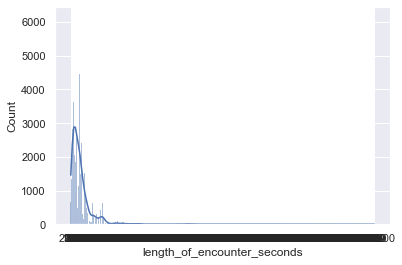

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
ufo_data = ufo_data.dropna()
sns.set(style='darkgrid')

sns.histplot(data=ufo_data, x='length_of_encounter_seconds', kde=True)
plt.show()

In [15]:
from scipy import stats
#trying to balance the training data

y_train_balanced, _lambda = stats.boxcox(y_train.astype('float'))

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

model2 = LinearRegression().fit(X_train, y_train_balanced)

In [17]:

predictions = model2.predict(X_test)

In [18]:
r2_score(y_test, predictions)

-28195246.60536409

In [19]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(y_test, predictions)

7881128.276705277

In [20]:
mean_squared_error(y_test, predictions)

3.4899513582975725e+17

all the metrics show that this model is not very accurate at all no matter what features we try to use, which suggests that the duration of encounters cannot be predicted from time and location

### FINDING A CORRELATION BETWEEN SIGHTINGS AND MOON PHASES


In [21]:
ufo_data = ufo_data_clone


In [48]:
#making a usable dataframe
moon_data = moon_data_raw[0]
moon_data = moon_data.drop(['Unnamed: 0'], axis= 1)
moon_data = moon_data.rename(columns = {'Unnamed: 1' : 'new_moons', 'Unnamed: 2' : 'first_quarter_moon', 'Unnamed: 3' : 'full_moons', 'Unnamed: 4' : 'third_quarter_moons'})
moon_data = moon_data.drop([0, 1])
moon_data

#disregarding data with dates out ouf sightings data scope
moon_data['full_moons'] = pd.to_datetime(moon_data['full_moons'])
moon_data['new_moons'] = pd.to_datetime(moon_data['new_moons'])
moon_data['first_quarter_moon'] = pd.to_datetime(moon_data['first_quarter_moon'])
moon_data['third_quarter_moons'] = pd.to_datetime(moon_data['third_quarter_moons'])
moon_data = moon_data[moon_data['full_moons'] >= pd.to_datetime("10/10/1949") ]
moon_data = moon_data[moon_data['full_moons'] <= pd.to_datetime('31/12/2013')]

moon_data  

moon_data1 = pd.DataFrame()
moon_data2 = pd.DataFrame()
moon_data3 = pd.DataFrame()
moon_data4 = pd.DataFrame()

moon_data1['date'], moon_data1['phase'] = [moon_data["new_moons"], 'new_moon']
moon_data2['date'], moon_data2['phase'] = [moon_data["full_moons"], 'full_moons']
moon_data3['date'], moon_data3['phase'] = [moon_data["first_quarter_moon"], 'first_quarter_moon']
moon_data4['date'], moon_data4['phase'] = [moon_data["third_quarter_moons"], 'third_quarter_moons']

moon_data = pd.concat([moon_data1, moon_data2, moon_data3, moon_data4])
moon_data = moon_data.sort_values(by = ['date'])

moon_data['date'] = pd.to_datetime(moon_data['date'])

ufo_data['Date_time'] = pd.to_datetime(ufo_data['Date_time'])
ufo_data['year'] = ufo_data['Date_time'].dt.year
ufo_data['month'] = ufo_data['Date_time'].dt.month
ufo_data['day'] = ufo_data['Date_time'].dt.day

C:\Users\robertaparna\AppData\Local\Temp\ipykernel_14984\3683854053.py:14: UserWarning: Parsing '31/12/2013' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  moon_data = moon_data[moon_data['full_moons'] <= pd.to_datetime('31/12/2013')]


In [23]:
moon_data

,date,phase
623,1949-11-05,full_moons
624,1949-12-05,full_moons
625,1950-01-03,full_moons
623,1950-01-18,new_moon
623,1950-01-25,first_quarter_moon
...,...,...
1415,2014-02-06,first_quarter_moon
1416,2014-02-22,third_quarter_moons
1415,2014-03-01,new_moon
1416,2014-03-08,first_quarter_moon


In [59]:
ufo_data

,Date_time,country,UFO_shape,length_of_encounter_seconds,date_documented,latitude,longitude,year,month,day
0,1949-10-10 20:30:00,us,cylinder,2700,4/27/2004,29.883056,-97.941111,1949,10,10
2,1955-10-10 17:00:00,gb,circle,20,1/21/2008,53.200000,-2.916667,1955,10,10
3,1956-10-10 21:00:00,us,circle,20,1/17/2004,28.978333,-96.645833,1956,10,10
4,1960-10-10 20:00:00,us,light,900,1/22/2004,21.418056,-157.803611,1960,10,10
5,1961-10-10 19:00:00,us,sphere,300,4/27/2007,36.595000,-82.188889,1961,10,10
...,...,...,...,...,...,...,...,...,...,...
80327,2013-09-09 21:15:00,us,light,NaN,9/30/2013,NaN,-86.784444,2013,9,9
80328,2013-09-09 22:00:00,us,circle,NaN,9/30/2013,NaN,-116.202500,2013,9,9
80329,2013-09-09 22:00:00,us,other,NaN,9/30/2013,NaN,-122.284444,2013,9,9
80330,2013-09-09 22:20:00,us,circle,NaN,9/30/2013,NaN,-77.265556,2013,9,9


In [52]:
import datetime

def count_sightings_moon(x):
    
    try:
        sightings = ufo_data[(ufo_data['year']==x.year) & (ufo_data['month']==x.month) & (ufo_data['day']==x.day)]
        return len(sightings)
    except Exception as e: 
        print(e)
   
    return 0
    
    

moon_data['sightings'] = [count_sightings_moon(x) for x in moon_data['date']]

In [64]:
count = moon_data.groupby(['phase'])['sightings'].sum()
count

phase
first_quarter_moon     2334
full_moons             2307
new_moon               2549
third_quarter_moons    2364
Name: sightings, dtype: int64

In [58]:
count.sum()

9554

In [61]:
#percentage we would be expecting 
len(moon_data)/(365*(2013-1949))*100

13.595890410958905

In [63]:
#percentage that actually took place during main moon phases
count.sum()/len(ufo_data)*100

13.846176142374746

chi-square test

In [54]:
expected = count.sum() / 4
expected

2388.5

In [55]:
x_2 = ((count[0]-expected)**2)/expected + ((count[1]-expected)**2)/expected + ((count[2]-expected)**2)/expected + ((count[3]-expected)**2)/expected

x_2

15.06091689344777

at significance level 0.025 this data is significantly different from what was expected. 

when counting all the ufo sightings that have taken place during primary moon phases, we can see that sightings are disproportionately more likely to occur during the new moon

### FINDING A CORRELATION BETWEEN METEORITE LANDINGS AND UFO SIGHTINGS

In [28]:
ufo_data_clone_2

,Date_time,city,state/province,country,UFO_shape,length_of_encounter_seconds,described_duration_of_encounter,description,date_documented,latitude,longitude
0,10/10/1949 20:30,san marcos,tx,us,cylinder,2700,45 minutes,This event took place in early fall around 194...,4/27/2004,29.8830556,-97.941111
1,10/10/1949 21:00,lackland afb,tx,NaN,light,7200,1-2 hrs,1949 Lackland AFB&#44 TX. Lights racing acros...,12/16/2005,29.38421,-98.581082
2,10/10/1955 17:00,chester (uk/england),NaN,gb,circle,20,20 seconds,Green/Orange circular disc over Chester&#44 En...,1/21/2008,53.2,-2.916667
3,10/10/1956 21:00,edna,tx,us,circle,20,1/2 hour,My older brother and twin sister were leaving ...,1/17/2004,28.9783333,-96.645833
4,10/10/1960 20:00,kaneohe,hi,us,light,900,15 minutes,AS a Marine 1st Lt. flying an FJ4B fighter/att...,1/22/2004,21.4180556,-157.803611
...,...,...,...,...,...,...,...,...,...,...,...
80327,9/9/2013 21:15,nashville,tn,us,light,600.0,10 minutes,Round from the distance/slowly changing colors...,9/30/2013,36.165833,-86.784444
80328,9/9/2013 22:00,boise,id,us,circle,1200.0,20 minutes,Boise&#44 ID&#44 spherical&#44 20 min&#44 10 r...,9/30/2013,43.613611,-116.202500
80329,9/9/2013 22:00,napa,ca,us,other,1200.0,hour,Napa UFO&#44,9/30/2013,38.297222,-122.284444
80330,9/9/2013 22:20,vienna,va,us,circle,5.0,5 seconds,Saw a five gold lit cicular craft moving fastl...,9/30/2013,38.901111,-77.265556


In [29]:
len(meteorite_data)
ufo_data = ufo_data_clone_2
ufo_data = ufo_data.drop(['described_duration_of_encounter', 'description', 'city', 'state/province'], axis=1)
ufo_data = ufo_data.dropna()

#changing invalid values
ufo_data['Date_time'] = ufo_data['Date_time'].str.replace('24:','00:')
ufo_data['length_of_encounter_seconds'] = ufo_data['length_of_encounter_seconds'].str.replace('`', '')
ufo_data['latitude'] = ufo_data['latitude'].str.replace('q', '')

ufo_data['year'] = pd.to_datetime(ufo_data['Date_time']).dt.year
ufo_data['longitude'] = ufo_data['longitude'].astype(float)
ufo_data['latitude'] = ufo_data['latitude'].astype(float)

In [30]:
meteorite_data['longitude'] = meteorite_data['GeoLocation'].str.split(', ').str[0].str[1:]
meteorite_data['latitude'] = meteorite_data['GeoLocation'].str.split(', ').str[1].str[:-2]
meteorite_data = meteorite_data.drop(['GeoLocation'], axis= 1)

meteorite_data['year'] = pd.to_datetime(meteorite_data['year'], errors = 'coerce').dt.year
meteorite_data = meteorite_data.dropna()
meteorite_data = meteorite_data[meteorite_data['year'] <= 2013]
meteorite_data = meteorite_data[meteorite_data['year'] >= 1949]

meteorite_data

,name,nametype,recclass,mass (g),fall,year,reclat,reclong,longitude,latitude
1,Aarhus,Valid,H6,720.0,Fell,1951.0,56.18333,10.23333,56.183330,10.23333
2,Abee,Valid,EH4,107000.0,Fell,1952.0,54.21667,-113.00000,54.216670,-113.00000
3,Acapulco,Valid,Acapulcoite,1914.0,Fell,1976.0,16.88333,-99.90000,16.883330,-99.90000
6,Adzhi-Bogdo (stone),Valid,LL3-6,910.0,Fell,1949.0,44.83333,95.16667,44.833330,95.16667
10,Aioun el Atrouss,Valid,Diogenite-pm,1000.0,Fell,1974.0,16.39806,-9.57028,16.398060,-9.57028
...,...,...,...,...,...,...,...,...,...,...
2822,Zillah 001,Valid,L6,1475.0,Found,1990.0,29.03700,17.01850,29.037000,17.01850
2823,Zillah 002,Valid,Eucrite,172.0,Found,1990.0,29.03700,17.01850,29.037000,17.01850
2824,Zinder,Valid,"Pallasite, ungrouped",46.0,Found,1999.0,13.78333,8.96667,13.783330,8.96667
2826,Zubkovsky,Valid,L6,2167.0,Found,2003.0,49.78917,41.50460,49.789170,41.50460


In [31]:
import geopy.distance

def count_sightings_meteorites(year, longitude, latitude): 
    #theoretically we can see meteorites from up to 1120 km away
    value = ufo_data[(ufo_data['year'] == year) & (abs(float(latitude)-ufo_data['latitude']) < 11)]
    if(len(value) > 0):
        value['meteorite'] = value.apply(lambda row: close_enough_to_see(latitude, longitude, row.latitude, row.longitude), axis = 1)
        return value['meteorite'].sum()
    return 0
    
def close_enough_to_see(lat1, lon1, lat2, lon2):
    try:
        if geopy.distance.geodesic((lat1, lon1), (lat2, lon2)).km < 1120:
            return 1
    except:
        pass
    return 0
    
meteorite_data['sightings'] = meteorite_data.apply(lambda row: count_sightings_meteorites(row.year, row.longitude, row.latitude), axis=1)
sightings_with_connection_to_meteorites = meteorite_data['sightings'].sum()

In [32]:
sightings_with_connection_to_meteorites / len(ufo_data)*100

2.1796785553832554

out of all the sightings 2.18% happened in the same year and close enough to see to a documented meteorite landing. since we know only the year of the meteorite landing there is a good chance a lot of the sightings counted actually happened a long time apart. so this estimate is very optimistic and it is still very small. 